# A Simple MLP

In [1]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

In [2]:
df = pd.read_csv('./data/train.csv')
print("DataFrame Shape: {} rows, {} columns".format(*df.shape))
display(df.head())

DataFrame Shape: 29701 rows, 10 columns


,t,1,2,3,4,time,x,y,delta_x,delta_y
0,0.00,119.947865,102.751992,100.623908,101,0.00,15.860380,-23.297520,0.000000,0.000000
1,0.01,119.927054,102.738962,100.628316,101,0.01,15.860189,-23.298586,-0.000191,-0.001066
2,0.02,119.906244,102.725932,100.632724,101,0.02,15.859999,-23.299651,-0.000191,-0.001066
3,0.03,119.885434,102.712902,100.637131,101,0.03,15.859808,-23.300717,-0.000191,-0.001066
4,0.04,119.864623,102.699872,100.641539,101,0.04,15.859618,-23.301783,-0.000191,-0.001066


In [3]:
features_considered = ['1', '2', '3', '4']

features = df[features_considered]
features.index = df['t']
features.head()

,1,2,3,4
t,,,,
0.00,119.947865,102.751992,100.623908,101
0.01,119.927054,102.738962,100.628316,101
0.02,119.906244,102.725932,100.632724,101
0.03,119.885434,102.712902,100.637131,101
0.04,119.864623,102.699872,100.641539,101


In [4]:
# outputs_considered = ['delta_x', 'delta_y']
outputs_considered = ['x', 'y']
outputs = df[outputs_considered]
outputs.index = df['t']
outputs.head()

,x,y
t,,
0.00,15.860380,-23.297520
0.01,15.860189,-23.298586
0.02,15.859999,-23.299651
0.03,15.859808,-23.300717
0.04,15.859618,-23.301783


array([<AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>,
       <AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>], dtype=object)

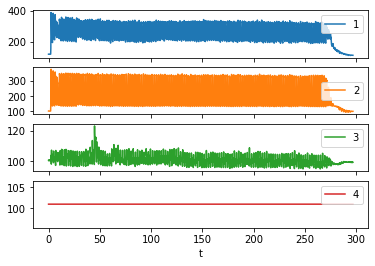

In [5]:
features.plot(subplots=True)

array([<AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>], dtype=object)

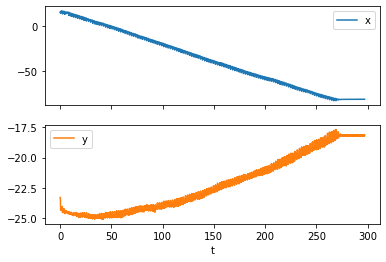

In [6]:
outputs.plot(subplots=True)

In [7]:
# We use "lr_schedule" to see which "learning rate" is optimum 
# Run the model with less epoch to visualize "learning rate" vs "loss"
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
                    lambda epoch: 1e-8 * 10**(epoch/20))
# Optimizer and loos parameters
# loss = tf.keras.losses.Huber()
# optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
optimizer = 'adam'

In [8]:

# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Input(shape=(n_inputs,)))
    model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs))
    # model.compile(loss='mae', optimizer='adam')
    model.compile(loss='mae', optimizer=optimizer)
    return model

# load dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
X = features.values
y = outputs.values
print(X.shape)
print(y.shape)

# evaluate model
results = list()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# enumerate folds
for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # define model
    model = get_model(n_inputs, n_outputs)
    # fit model
    model.fit(X_train, y_train, verbose=0, epochs=10)
    # history = model.fit(X_train, y_train, verbose=0, epochs=10, callbacks=[lr_schedule])
    # evaluate model on test set
    mae = model.evaluate(X_test, y_test, verbose=0)
    # store result
    print('iteration %d: MAE = %.3f' %(len(results), mae))

    results.append(mae)
    
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

(29701, 4)
(29701, 2)
iteration 0: MAE = 10.874
iteration 1: MAE = 12.101
iteration 2: MAE = 9.433
iteration 3: MAE = 8.454
iteration 4: MAE = 8.989
iteration 5: MAE = 9.985
iteration 6: MAE = 9.478
iteration 7: MAE = 8.875
iteration 8: MAE = 11.899
iteration 9: MAE = 8.438
iteration 10: MAE = 9.022
iteration 11: MAE = 10.338
iteration 12: MAE = 8.638
iteration 13: MAE = 11.458
iteration 14: MAE = 9.385
iteration 15: MAE = 10.144
iteration 16: MAE = 8.961
iteration 17: MAE = 9.417
iteration 18: MAE = 9.383
iteration 19: MAE = 9.141
iteration 20: MAE = 8.713
iteration 21: MAE = 10.607
iteration 22: MAE = 9.083
iteration 23: MAE = 9.304
iteration 24: MAE = 8.731
iteration 25: MAE = 10.368
iteration 26: MAE = 9.809
iteration 27: MAE = 9.553
iteration 28: MAE = 9.808
iteration 29: MAE = 11.605
MAE: 9.733 (1.005)


In [9]:
y_pred = model.predict(X)
print('Predicted: %s' % y_pred[:5])

Predicted: [[-76.78053  -17.67771 ]
 [-76.78086  -17.677645]
 [-76.78119  -17.677574]
 [-76.78153  -17.677513]
 [-76.78185  -17.677444]]


In [10]:
print('Real Value: %s' % y[:5])

Real Value: [[ 15.86038    -23.29752   ]
 [ 15.86018939 -23.29858573]
 [ 15.85999878 -23.29965147]
 [ 15.85980817 -23.3007172 ]
 [ 15.85961756 -23.30178294]]
